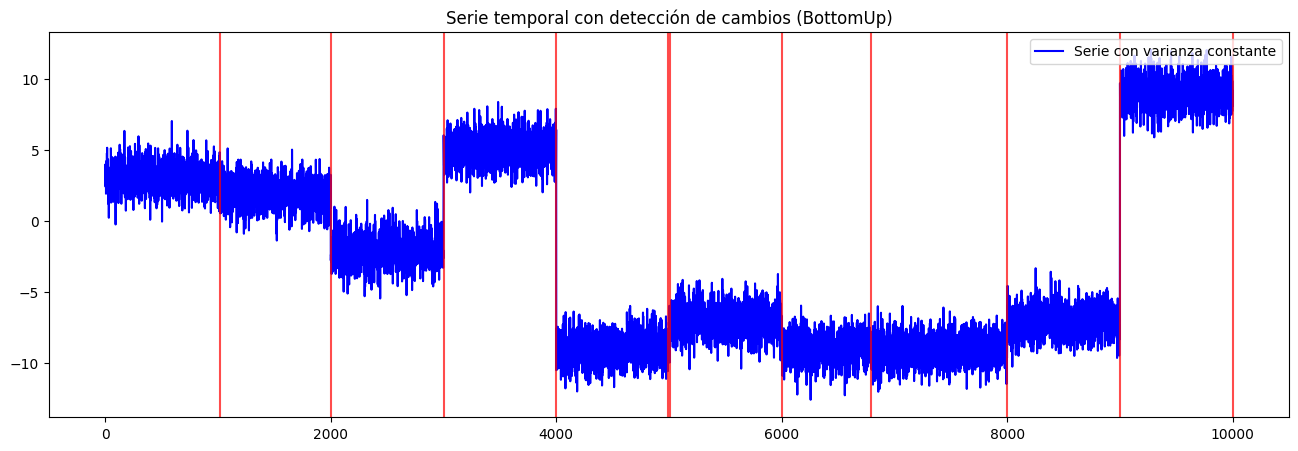

In [4]:
# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Función para generar una serie con VARIANZA CONSTANTE
def serie_varianza_constante(num_segmentos, tamano_segmento):
    serie = np.concatenate([
        np.random.normal(np.random.randint(-10, 10), 1, tamano_segmento)
        for _ in range(num_segmentos)
    ])
    return pd.Series(serie)

# Generar la serie
serie1 = serie_varianza_constante(10, 1000)
serie1_np = serie1.values

# Función para aplicar BottomUp y obtener los puntos de cambio
def detectar_cambios_bottomup(ts, modelo="l2", num_cambios=10):
    bottomup = rpt.BottomUp(model=modelo).fit(ts)
    puntos_cambio = bottomup.predict(n_bkps=num_cambios)
    return puntos_cambio

# Detectar los 10 cambios más importantes
puntos_cambio1 = detectar_cambios_bottomup(serie1_np, modelo="l2", num_cambios=10)

# Función para graficar la serie con los puntos de cambio detectados
def graficar_cambios(serie, puntos_cambio):
    plt.figure(figsize=(16, 5))
    plt.plot(serie, label="Serie con varianza constante", color='blue')

    for x in puntos_cambio:
        plt.axvline(x, lw=1.5, color='red', alpha=0.7)

    plt.title("Serie temporal con detección de cambios (BottomUp)")
    plt.legend(loc="upper right")
    plt.show()

# Graficar la serie con los cambios detectados
graficar_cambios(serie1, puntos_cambio1)
plt.show()


### 📊  Observaciones sobre BottomUp

El algoritmo **BottomUp** fue capaz de detectar todos los puntos de cambio en la serie
temporal con **varianza constante**, esto confirma la efectividad del método. 